In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/home/protein/Documents/qbb_bootcamp/qbb2020-answers/day2-evening/matrix_1kg.txt',sep='\t')
df

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,chr21,24504037,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,chr21,14465625,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,chr21,18700688,C,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,chr21,16641027,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,chr21,41379506,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(10000, 2552)

In [4]:
x,y = df.shape
numSample = y-4
import numpy as np
lstFreq = []
for i in range(x):
    lstFreq.append(np.sum(list(df.iloc[i,4:]))/(numSample*2))

Text(0.5, 1.0, 'Allele Frequency')

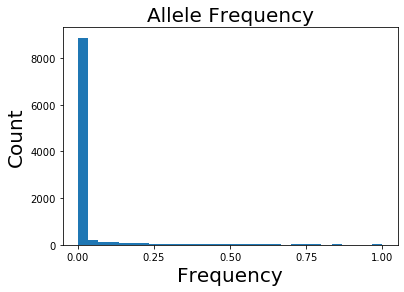

In [5]:
plt.hist(lstFreq,bins = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Allele Frequency',fontsize = 20)

In [6]:
commonVar = []
for i in range(len(lstFreq)):
    if (lstFreq[i] > 0.05) and (lstFreq[i] < 0.95):
        commonVar.append(True)
    else:
        commonVar.append(False)

In [15]:
df2 = df.loc[commonVar,:]
df2

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
54,chr21,40591784,A,G,0,1,1,1,2,0,...,1,0,2,1,2,0,0,0,2,2
66,chr21,10464438,A,T,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
77,chr21,21921732,A,G,1,0,1,0,0,1,...,1,2,0,0,0,0,0,0,1,0
93,chr21,25650504,G,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,chr21,16916953,T,A,2,1,2,0,0,0,...,2,0,1,0,1,0,1,2,0,0


In [17]:
pca_input = df2.iloc[:,4:]
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
54,0,1,1,1,2,0,0,1,1,2,...,1,0,2,1,2,0,0,0,2,2
66,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
77,1,0,1,0,0,1,0,0,0,1,...,1,2,0,0,0,0,0,0,1,0
93,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
98,2,1,2,0,0,0,1,0,1,0,...,2,0,1,0,1,0,1,2,0,0


In [18]:
pca_input = pca_input.T
pca_input

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
HG00102,0,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,2,0,1,1,0
HG00103,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0
HG00104,0,0,1,0,0,1,0,0,0,0,...,0,0,1,1,1,2,0,0,1,0
HG00105,0,0,1,0,0,1,0,0,1,1,...,0,0,0,0,2,2,0,0,2,0
HG00106,0,1,0,0,1,2,0,1,0,0,...,0,0,1,0,1,1,0,0,2,0


In [19]:
pca_input.mean(axis = 0)

20      0.160518
32      1.191523
38      0.811224
41      0.188776
46      0.195055
54      0.893250
66      0.302983
77      0.319074
93      0.342622
98      0.659341
107     1.331240
114     0.188383
116     0.981162
128     0.423469
135     0.559655
139     0.433281
161     0.120094
164     0.737834
165     1.758634
175     0.377943
179     0.197410
182     0.717818
190     0.644035
193     0.235479
202     0.871272
204     0.238619
214     1.731162
222     0.270408
223     0.694662
238     0.253925
          ...   
9578    0.145212
9613    0.798666
9617    1.320251
9638    0.723705
9692    0.783752
9698    0.153454
9706    0.325353
9719    0.968210
9721    0.137755
9724    0.124411
9730    0.814757
9790    1.089482
9812    0.143250
9815    1.688776
9818    0.150706
9820    1.576531
9837    1.427786
9841    1.795133
9847    1.035322
9873    1.281790
9894    0.229592
9904    0.133438
9913    0.746860
9927    0.654631
9929    1.184458
9957    1.683673
9959    0.231947
9974    0.3614

In [20]:
pca_input.var(axis = 0)

20      0.150510
32      0.504333
38      0.525402
41      0.193247
46      0.187694
54      0.516280
66      0.211267
77      0.275459
93      0.322690
98      0.464981
107     0.495655
114     0.178868
116     0.550096
128     0.373803
135     0.453056
139     0.407404
161     0.133196
164     0.539801
165     0.233435
175     0.334134
179     0.189911
182     0.447629
190     0.479050
193     0.180099
202     0.532304
204     0.181751
214     0.196641
222     0.240553
223     0.501157
238     0.297884
          ...   
9578    0.139094
9613    0.510293
9617    0.526374
9638    0.550251
9692    0.504848
9698    0.155869
9706    0.310672
9719    0.542766
9721    0.136100
9724    0.116043
9730    0.490995
9790    0.550294
9812    0.142408
9815    0.303965
9818    0.189293
9820    0.355743
9837    0.422345
9841    0.193584
9847    0.543707
9873    0.491431
9894    0.217781
9904    0.132953
9913    0.550343
9927    0.470387
9929    0.500709
9957    0.287020
9959    0.213553
9974    0.3204

In [21]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

/home/protein/Downloads/miniconda3/envs/md/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/protein/Downloads/miniconda3/envs/md/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([ -1.56424673e-16,  -6.55327876e-16,   1.11871963e-16,
         4.68707578e-16,   8.27438589e-17,  -1.18865322e-16,
         5.70536118e-16,   1.65749152e-16,   2.45835098e-16,
         2.91847481e-16,  -6.09446211e-16,  -1.71966924e-15,
         1.30866777e-15,  -5.22606552e-16,  -1.47396485e-15,
         7.63822984e-16,   2.23051126e-15,  -1.98210539e-16,
         1.09048476e-15,   5.13979231e-16,   1.90010226e-15,
         3.07794955e-16,   1.41814870e-15,   2.18210240e-16,
         1.21828241e-16,  -2.11726677e-15,   1.54158911e-16,
        -3.32805473e-16,  -1.36189682e-15,  -3.84264398e-16,
         1.92110413e-16,   2.84091606e-16,  -3.47184343e-16,
         2.08206032e-15,  -4.99861795e-16,  -1.89713934e-15,
        -1.42045803e-16,  -8.29878639e-16,   2.96379004e-16,
         3.13546503e-16,  -5.90753680e-16,  -2.23621923e-15,
        -6.62038016e-16,  -1.99674570e-15,  -2.44266494e-16,
        -1.29531829e-15,  -5.92017278e-16,   1.59069513e-15,
        -3.25398177e-16,

In [22]:
pca_input_standardized.var(axis = 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [23]:
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.14493037, -9.81856662, -1.54641142, ...,  0.05495035,
        -0.76475033, -4.87247823],
       [-6.13388414, -8.63182907,  2.55713444, ...,  5.01855514,
        -2.4326132 ,  0.54723406],
       [-6.23847319, -7.97187   , -0.74598639, ..., -2.10290999,
         1.12204378, -0.25129594],
       ..., 
       [-4.09694721, -2.82736149, -4.18085248, ..., -0.1933992 ,
         1.0710685 ,  4.71776404],
       [-6.26346243, -2.58507988, -4.22562891, ..., -0.7078467 ,
         0.24183885,  3.26122007],
       [-3.17677867, -0.91694972, -6.45144963, ...,  3.68973172,
        -0.94852082,  3.05942329]])

In [24]:
pca_output.shape

(2548, 10)

In [25]:
pca_output_df = pd.DataFrame(data=pca_output,columns=['PC1','PC2','PC3','PC5','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_output_df

,PC1,PC2,PC3,PC5,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546411,-5.396598,-0.536551,-0.402270,1.038400,0.054950,-0.764750,-4.872478
1,-6.133884,-8.631829,2.557134,-3.897130,0.303483,-2.290869,0.515827,5.018555,-2.432613,0.547234
2,-6.238473,-7.971870,-0.745986,-4.014028,-0.936048,3.924514,-0.443860,-2.102910,1.122044,-0.251296
3,-5.051218,-7.008727,2.804416,-4.764285,4.386796,0.296031,0.171151,-2.509486,1.065354,-0.799664
4,-6.634383,-8.543670,3.072455,-1.593995,-4.385414,0.627042,1.008997,-2.826565,0.951271,2.037207
5,-4.741908,-8.374296,2.285565,-2.406184,-2.178384,-4.446185,-0.273325,0.047052,-0.017678,1.147256
6,-5.394303,-8.967307,1.564631,-4.541046,-2.474757,0.453758,-2.607304,0.367327,0.763785,1.755528
7,-5.102379,-8.338772,-0.004936,-1.739521,-0.209323,4.591626,-3.598020,0.113145,-2.445924,-2.772093
8,-6.298763,-7.352631,1.321473,-2.957632,-1.400964,-3.949572,-0.335107,-0.711962,1.797511,0.275966
9,-6.867452,-6.770400,0.078497,-1.867498,-4.063128,0.671274,-1.103883,3.114161,-2.054812,0.654467


Text(0, 0.5, 'PCA axis 2')

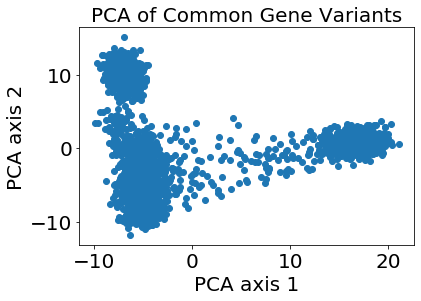

In [28]:
fig,ax = plt.subplots()
ax.scatter(x=pca_output_df['PC1'],y=pca_output_df['PC2'])
ax.set_title('PCA of Common Gene Variants',fontsize = 20)
ax.set_xlabel('PCA axis 1',fontsize = 20)
ax.set_ylabel('PCA axis 2',fontsize = 20)